In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\IRIS.csv")

df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
dic = {"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3}
df['species'] = [dic[x] for x in df['species']]

In [4]:
X = df.iloc[:,:4]
y =  df.iloc[:,4:]

In [5]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [6]:
X = X.values

In [7]:
# if input = None * 5 [None = number of samples and 5 = no of Features] 
# the weights = 5 * 3 [5 = number of input features 3 = number of output classes]

In [8]:
y = y.values

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):  # This will be used in back propag
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [10]:
one_hot_labels = np.zeros((150, 3))

for i in range(150):
    one_hot_labels[i, (y[i][0] - 1)] = 1

In [11]:
instances = X.shape[0] # 150
attributes = X.shape[1] # 4
hidden_nodes = 3
output_labels = 3

In [12]:
# define Weights and bias for hidden layer

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

In [13]:
# Define Weights and Bias for output layer

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)

In [14]:
lr = 10e-4

error_cost = []
iteration = []

In [16]:
for epoch in range(1000):

    ############# feedforward
    # Phase 1
    zh = np.dot(X, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

    ########## Back Propagation

    ########## Phase 1

    #dcost_dzo = ao - one_hot_labels
    #dzo_dwo = ah
    dcost_wo = np.dot(ah.T, (ao - one_hot_labels))
    dcost_bo = (ao - one_hot_labels)

    ########## Phases 2

    #dzo_dah = wo

    dcost_dah = np.dot((ao - one_hot_labels) , wo.T)
    dah_dzh = sigmoid_der(zh)
    dcost_wh = np.dot(X.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 20 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao)) # Loss Function for Categorical Cross Entropy
        iteration.append(epoch)
        
        #print('Loss function value: ', loss)
        error_cost.append(loss)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(iteration,error_cost)
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [ ]:
# Loss function for Categorical cross function

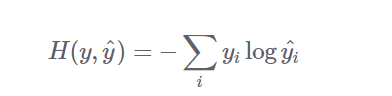